# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [100]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# 2. Collect and load data

In [101]:
df=pd.read_csv("Bigcity+(3).csv")
df.head(2)
df.drop(['Unnamed: 0'],1,inplace=True)


In [102]:
df.head(2)

,u,x
0,138,143
1,93,104


# 3. Explore numeric variables - five number summary

In [103]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
u    49 non-null int64
x    49 non-null int64
dtypes: int64(2)
memory usage: 912.0 bytes


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

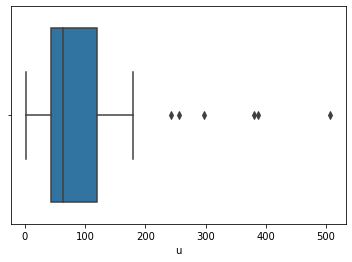

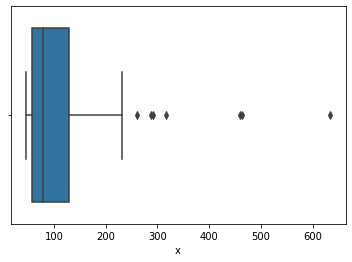

In [105]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

We can see outliers in population of both years. Also the min and max is different of both years.

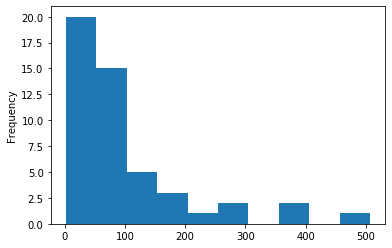

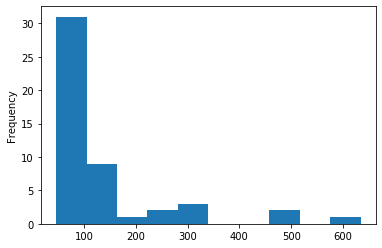

In [106]:
for i in df.columns:
    df[i].plot(kind='hist')
    plt.show()

in 1920,Mostly values lies btw 0-100
in 1930, mostly values lies btw 50-100

In [107]:
print("the variance of u:",df['u'].var())
print("the variance of x:",df['x'].var())
print("the std of u:",df['u'].std())
print("the std of x:",df['x'].std())

the variance of u: 10900.416666666662
the variance of x: 15158.832482993197
the std of u: 104.40506054146351
the std of x: 123.12121053252034


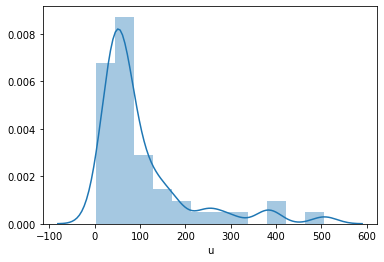

In [108]:
sns.distplot(df['u'])
plt.show()

#right skewed

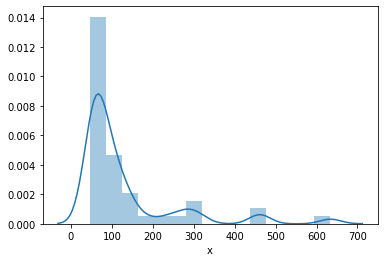

In [109]:
sns.distplot(df['x'])
plt.show()
#right skewed 

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

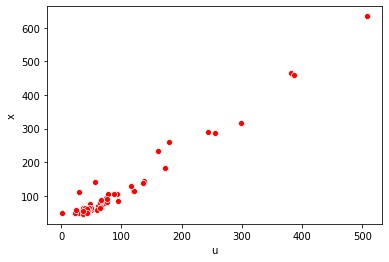

In [110]:
sns.scatterplot(df['u'],df['x'],color='r')
plt.show()

In [111]:
#pd.crosstab(df['u'],df['x']).value_counts()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [112]:
df.shape

(49, 2)

In [113]:
x=df['u']
y=df['x']
import scipy.stats as stats
box_y,lam=stats.boxcox(df['x'])
df['box_y']=pd.DataFrame(box_y)
df['box_y'].skew()

0.2869376968886859

In [114]:
x=df['u']
x=np.log(x)


In [115]:
x.skew()

-0.6857960088745365

In [116]:
df1=pd.concat([x,df['box_y']],1)
df1.head(2)

,u,box_y
0,4.927254,1.029190
1,4.532599,1.026065


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [117]:
df1.isna().sum()

u        0
box_y    0
dtype: int64

In [118]:
df1.corr()  # corr( btw transformed data)

,u,box_y
u,1.000000,0.837913
box_y,0.837913,1.000000


In [119]:
df.corr()   #corr of original data

,u,x,box_y
u,1.000000,0.981742,0.808027
x,0.981742,1.000000,0.804872
box_y,0.808027,0.804872,1.000000


In [120]:
#both columns have higher correlation.
#u is good predictor of x.

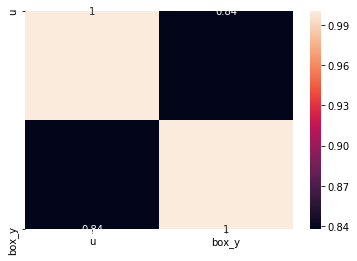

In [121]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [122]:
from sklearn.model_selection import train_test_split
x=df1['u'].values.reshape(-1,1)
y=df1['box_y'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [123]:
print("the x_train shape is",x_train.shape)
print("the y_train shape is",y_train.shape)
print("the x_test shape is",x_test.shape)
print("the y_test shape is",y_test.shape)

the x_train shape is (39, 1)
the y_train shape is (39, 1)
the x_test shape is (10, 1)
the y_test shape is (10, 1)


In [124]:
X=df['u'].values.reshape(-1,1)
Y=df['x'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [125]:
print("the x_train shape is",X_train.shape)
print("the y_train shape is",Y_train.shape)
print("the x_test shape is",X_test.shape)
print("the y_test shape is",Y_test.shape)

the x_train shape is (39, 1)
the y_train shape is (39, 1)
the x_test shape is (10, 1)
the y_test shape is (10, 1)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [126]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
print("the coefficicent of u is",lr.coef_)
print("the intercept of u is",lr.intercept_)

the coefficicent of u is [[0.00594484]]
the intercept of u is [0.99779812]


In [128]:
ypred=0.99779812+0.00594484*(df1['u'])
ypred.head()

#trying to predict yhat manually

0    1.027090
1    1.024744
2    1.022237
3    1.028636
4    1.020812
Name: u, dtype: float64

In [129]:
#for original data set the values would be

In [130]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
print("the coefficicent of u is",lr.coef_)
print("the intercept of u is",lr.intercept_)

the coefficicent of u is [[1.15542506]]
the intercept of u is [8.34500452]


In [132]:
b1=lr.coef_
b0=lr.intercept_

In [133]:
ypred=1.15542506+8.34500452*(df['u'])
ypred.head()

0    1152.766049
1     777.240845
2     510.200701
3    1494.911234
4     401.715642
Name: u, dtype: float64

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

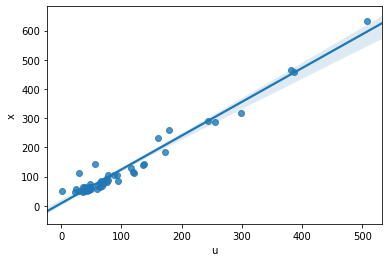

In [134]:
sns.regplot(x='u',y='x',data=df)
plt.show()

#this one is without transformation 

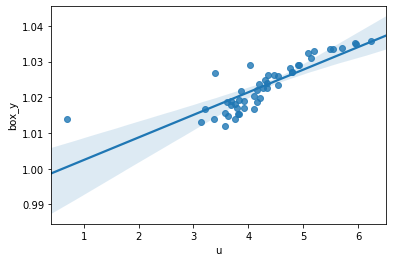

In [135]:
sns.regplot(x='u',y='box_y',data=df1)
plt.show()


#Linear relationship when we transform our data

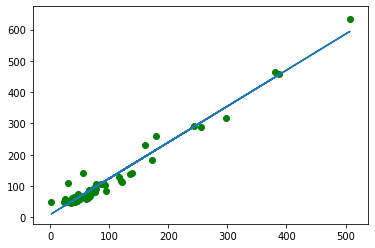

In [136]:
plt.plot(X,b1*X+b0)
plt.scatter(X,Y,color='g')
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [137]:
# Linear regression using transformed data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
#calculating ypred
ypred_train=lr.predict(x_train)
ypred_test=lr.predict(x_test)
#calculating r2_score and mse and rmse 
r2_train=r2_score(y_train,ypred_train)
r2_test=r2_score(y_test,ypred_test)
#calculating mse
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
#calculating rmse
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))

In [138]:
res=pd.DataFrame([r2_train,r2_test,mse_train,mse_test,rmse_test,rmse_train],index=["r2_train","r2_test","mse_train","mse_test","rmse_test","rmse_train"],columns=['Values'])
res

,Values
r2_train,0.666999
r2_test,0.816731
mse_train,0.000015
mse_test,0.000009
rmse_test,0.003003
rmse_train,0.003904


In [139]:
# Linear regression using original data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(X_train,Y_train)
#calculating ypred
ypred_train=lr.predict(X_train)
ypred_test=lr.predict(X_test)
#calculating r2_score and mse and rmse 
r2_train=r2_score(Y_train,ypred_train)
r2_test=r2_score(Y_test,ypred_test)
#calculating mse
mse_train=mean_squared_error(Y_train,ypred_train)
mse_test=mean_squared_error(Y_test,ypred_test)
#calculating rmse
rmse_train=np.sqrt(mean_squared_error(Y_train,ypred_train))
rmse_test=np.sqrt(mean_squared_error(Y_test,ypred_test))

In [140]:
res=pd.DataFrame([r2_train,r2_test,mse_train,mse_test,rmse_test,rmse_train],index=["r2_train","r2_test","mse_train","mse_test","rmse_test","rmse_train"],columns=['Values'])
res

,Values
r2_train,0.959613
r2_test,0.980375
mse_train,601.421569
mse_test,287.853876
rmse_test,16.966257
rmse_train,24.523898


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [146]:
lr.score(X_train,Y_train)

0.9596126269828567

In [144]:
lr.score(X_test,Y_test)

0.980375436960151